In [1]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import time
import re
import numpy as np

req_headers = {
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8',
    'accept-encoding': 'gzip, deflate, br',
    'accept-language': 'en-US,en;q=0.8',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/61.0.3163.100 Safari/537.36'}

url = 'https://www.imdb.com/search/title?title_type=feature&release_date=1994-01-01,1994-12-31&sort=moviemeter,asc&page=1&ref_=adv_prv'

url1 = 'https://www.imdb.com/search/title?title_type=feature&release_date='
url2 = '-01-01,'
url3 = '-12-31&sort=num_votes,desc&page='
url4 = '&ref_=adv_prv'
    

In [2]:
names = []
years = []
imdb_ratings = []
meta = []
votes = []
gross = []


In [3]:
yearrange = range(2010,2017)
pagerange = range(1,4)

counter = 0

for year in yearrange:
    
    for page in pagerange:
        
        time.sleep(10)
    
        with requests.Session() as s:
            response = s.get(url1+str(year)+url2+str(year)+url3+str(page)+url4, headers=req_headers)
            counter = counter + 1
            print(response.status_code)
            soup = bs(response.text, 'html.parser')
            movie_containers = soup.find_all('div', class_ = 'lister-item mode-advanced')
            for container in movie_containers:
        
                if container.find('span', class_ = 'metascore favorable') != None:
        
                    name = container.h3.a.text
                    names.append(name)
        
                    year = container.find('span', class_ = 'lister-item-year text-muted unbold')
                    year = year.get_text()
                    years.append(year)
        
                    imdb = float(container.strong.text)
                    imdb_ratings.append(imdb)
        
                    met = container.find('span', class_ = 'metascore favorable')
                    met = int(met.get_text())
                    meta.append(met)
        
                    vote = container.find('span', {'name':'nv'})
                    vote = vote.text
                    vote = vote.replace(',','')
                    votes.append(int(vote))
        
                    #money = container.find_all('span',{'name':'nv'})
                    #money = money[1]
                    #gross.append(money.get_text())
        

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200


In [4]:
df = pd.DataFrame({'Names': names, 'Year': years, 'imdb_rating': imdb_ratings, 'meta':meta, 'votes': votes})

In [5]:
df.shape

(799, 5)

In [9]:
df.sort_values('votes', ascending=False, inplace=True)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.shape

(259, 5)

In [17]:
df = df.reset_index()

In [22]:
df.drop('index', axis=1, inplace=True)

In [24]:
df.head(20)

,Names,Year,imdb_rating,meta,votes
0,Inception,(2010),8.8,74,1754388
1,The Dark Knight Rises,(2012),8.4,78,1334849
2,Interstellar,(2014),8.6,74,1217408
3,Django Unchained,(2012),8.4,81,1155978
4,The Avengers,(2012),8.1,69,1128360
5,The Wolf of Wall Street,(2013),8.2,75,979424
6,Shutter Island,(2010),8.1,63,958434
7,Guardians of the Galaxy,(2014),8.1,76,879025
8,Up,(2009),8.3,88,806148
9,The Truman Show,(1998),8.1,90,801197


In [29]:
import re
df.Year = df.Year.apply(lambda x: re.search(r'\d\d\d\d', x).group())
df.Year = df.Year.astype(int)

In [30]:
df.dtypes

Names           object
Year             int64
imdb_rating    float64
meta             int64
votes            int64
dtype: object

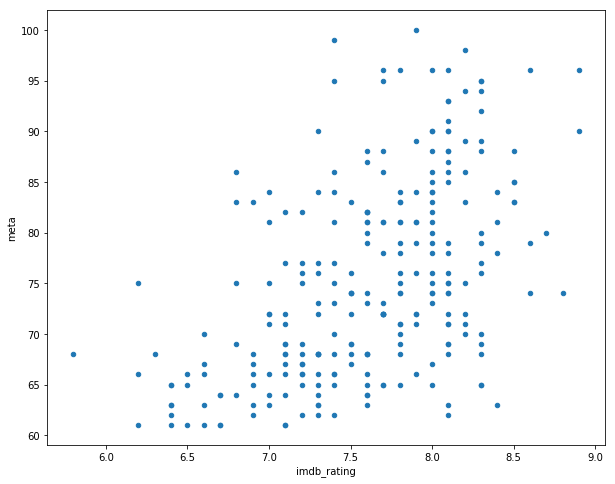

In [47]:
import matplotlib.pyplot as plt
%matplotlib inline
df.plot.scatter('imdb_rating','meta', figsize=(10,8))

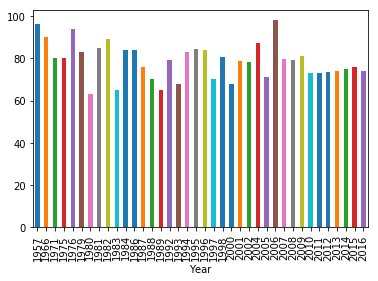

In [42]:
df.groupby('Year')['meta'].mean().plot(kind='bar')

In [43]:
#Best Year for Movies was 2006